### Spatial Interpolation with GDAL

#### Nearest Neighbor

The value of an unmeasured point depents on the value of the nearest known point. Search grids can be defined so that the nearest neighbor is located inside such grid

In [6]:
from osgeo import gdal, ogr
import matplotlib.pyplot as plt

In [2]:
dem = gdal.Open('output/north_mexico_clip_mask.tiff', 0)
gt = dem.GetGeoTransform()
ulx = gt[0]
uly = gt[3]
res = gt[1]

xsize = dem.RasterXSize
ysize = dem.RasterYSize

lrx = ulx + xsize * res
lry = uly - ysize * res

dem = None

In [3]:
point_shp_path = 'output/north_mexico_clip_points.shp'
points = ogr.Open(point_shp_path)
layer = points.GetLayer()

In [8]:
for field in layer.schema:
    print(field.name)

north_mexi
elevation
id


In [4]:
points = layer = None

In [25]:
nn = gdal.Grid('output/north_mexico_clip_nearest_neighbor.tif', point_shp_path,
               zfield='elevation', algorithm='nearest',
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)

In [26]:
arr = nn.GetRasterBand(1).ReadAsArray()

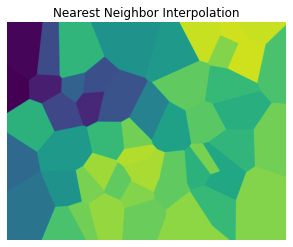

In [27]:
fig = plt.figure(figsize=(5, 5))
plt.title('Nearest Neighbor Interpolation')
plt.imshow(arr, vmin=0, vmax=70)
plt.axis('off')
plt.show()

In [28]:
nn = None

#### Moving Average
Uses a search ellipse to find the know points inside it. The value for the unknown point is calculated by averaging the values of the known points found inside the ellipse

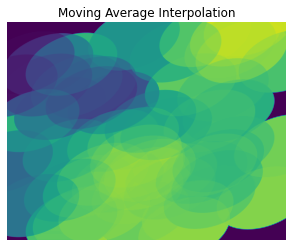

In [9]:
algorithm = 'average:radius1=2000:radius2=1200:angle=20'
ma = gdal.Grid('output/north_mexico_clip_moving_average.tif', point_shp_path,
               zfield='elevation', algorithm=algorithm,
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)


ar = ma.GetRasterBand(1).ReadAsArray()
ma = None

fig = plt.figure(figsize=(5, 5))
plt.title('Moving Average Interpolation')
plt.imshow(ar, vmin=0, vmax=70)
plt.axis('off')
plt.show()


In [32]:
ar.max()

0.0

#### Inverse Distance to a Power
Determines unknown values using a weighted average of values from known points, assuming that closer values have a greater influence than those further away

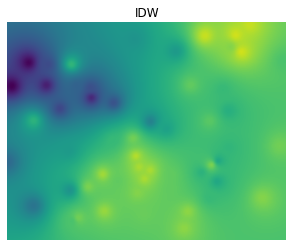

In [15]:
algorithm = 'invdist'
idw = gdal.Grid('output/north_mexico_clip_idw.tif', point_shp_path,
               zfield='elevation', algorithm=algorithm,
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)


ar = idw.GetRasterBand(1).ReadAsArray()
idw = None

fig = plt.figure(figsize=(5, 5))
plt.title('IDW')
plt.imshow(ar, vmin=0, vmax=70)
plt.axis('off')
plt.show()

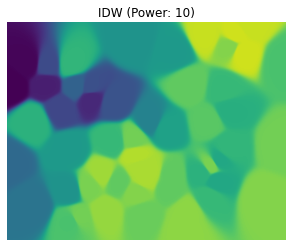

In [16]:
algorithm = 'invdist:power=10'
idw = gdal.Grid('output/north_mexico_clip_idw.tif', point_shp_path,
               zfield='elevation', algorithm=algorithm,
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)


ar = idw.GetRasterBand(1).ReadAsArray()
idw = None

fig = plt.figure(figsize=(5, 5))
plt.title('IDW (Power: 10)')
plt.imshow(ar, vmin=0, vmax=70)
plt.axis('off')
plt.show()

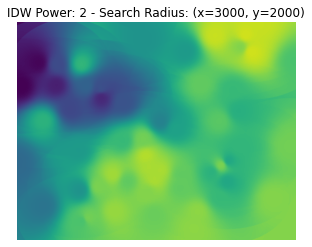

In [17]:
algorithm = 'invdist:power=3:radius1=3000:radius2=2000'
idw = gdal.Grid('output/north_mexico_clip_idw.tif', point_shp_path,
               zfield='elevation', algorithm=algorithm,
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)


ar = idw.GetRasterBand(1).ReadAsArray()
idw = None

fig = plt.figure(figsize=(5, 5))
plt.title('IDW Power: 2 - Search Radius: (x=3000, y=2000)')
plt.imshow(ar, vmin=0, vmax=70)
plt.axis('off')
plt.show()

#### Linear Interpolation
Computes a Delaunay triangulation and uses linear interpolation to assign a value based on a point's position within a triangle

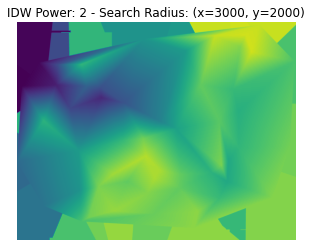

In [18]:
algorithm = 'linear'
lin = gdal.Grid('output/north_mexico_clip_idw.tif', point_shp_path,
               zfield='elevation', algorithm=algorithm,
               outputBounds=[ulx, uly, lrx, lry], width=xsize, height=ysize)

ar = lin.GetRasterBand(1).ReadAsArray()
idw = None

fig = plt.figure(figsize=(5, 5))
plt.title('IDW Power: 2 - Search Radius: (x=3000, y=2000)')
plt.imshow(ar, vmin=0, vmax=70)
plt.axis('off')
plt.show()